### Wheat Kernel Classification Model 

#### Data Set Information:
dataset link: https://archive.ics.uci.edu/ml/datasets/seeds



The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

This data set can be used to train a machine learning model to predict the class of the seed based on the other features. The features are:
#### Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. Area: area of the seed in square centimeters A,
2. Perimeter: perimeter of the seed in centimeters P,
3. Compactness: Compactness of the seed C = 4*pi*A/P^2,
4. Length of kernel: Length of kernel in mm,
5. Width of kernel: Width of kernel in mm,
6. Asymmetry coefficient: Asymmetry coefficient of the kernel
7. Length of kernel groove: Length of kernel groove in mm.

All of these parameters were real-valued continuous.




##### 1. Defining the problem
In India, 

##### 2. Collect and preprocess the data

In [22]:
# import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [23]:
# load the data
df = pd.read_csv('data/seeds_dataset.csv')


In [24]:
# check for missing values
print(df.isnull().sum())

Area                         0
Perimeter                    0
Compactness                  0
Length of kernel             0
Width of kernel              0
Asymmetry coefficient        0
Length of kernel groove      0
Class (1, 2, 3)              0
Unnamed: 8                 208
Unnamed: 9                 209
dtype: int64


In [25]:
#droping the unwaned columns
df.drop(['Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)

In [26]:
# check the data types & non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


##### 3.	Exploratory Data Analysis (EDA)

In [27]:
# check the first five rows of the data
df.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [28]:
# check the basic statistics of the data
df.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


<Figure size 3000x2500 with 0 Axes>

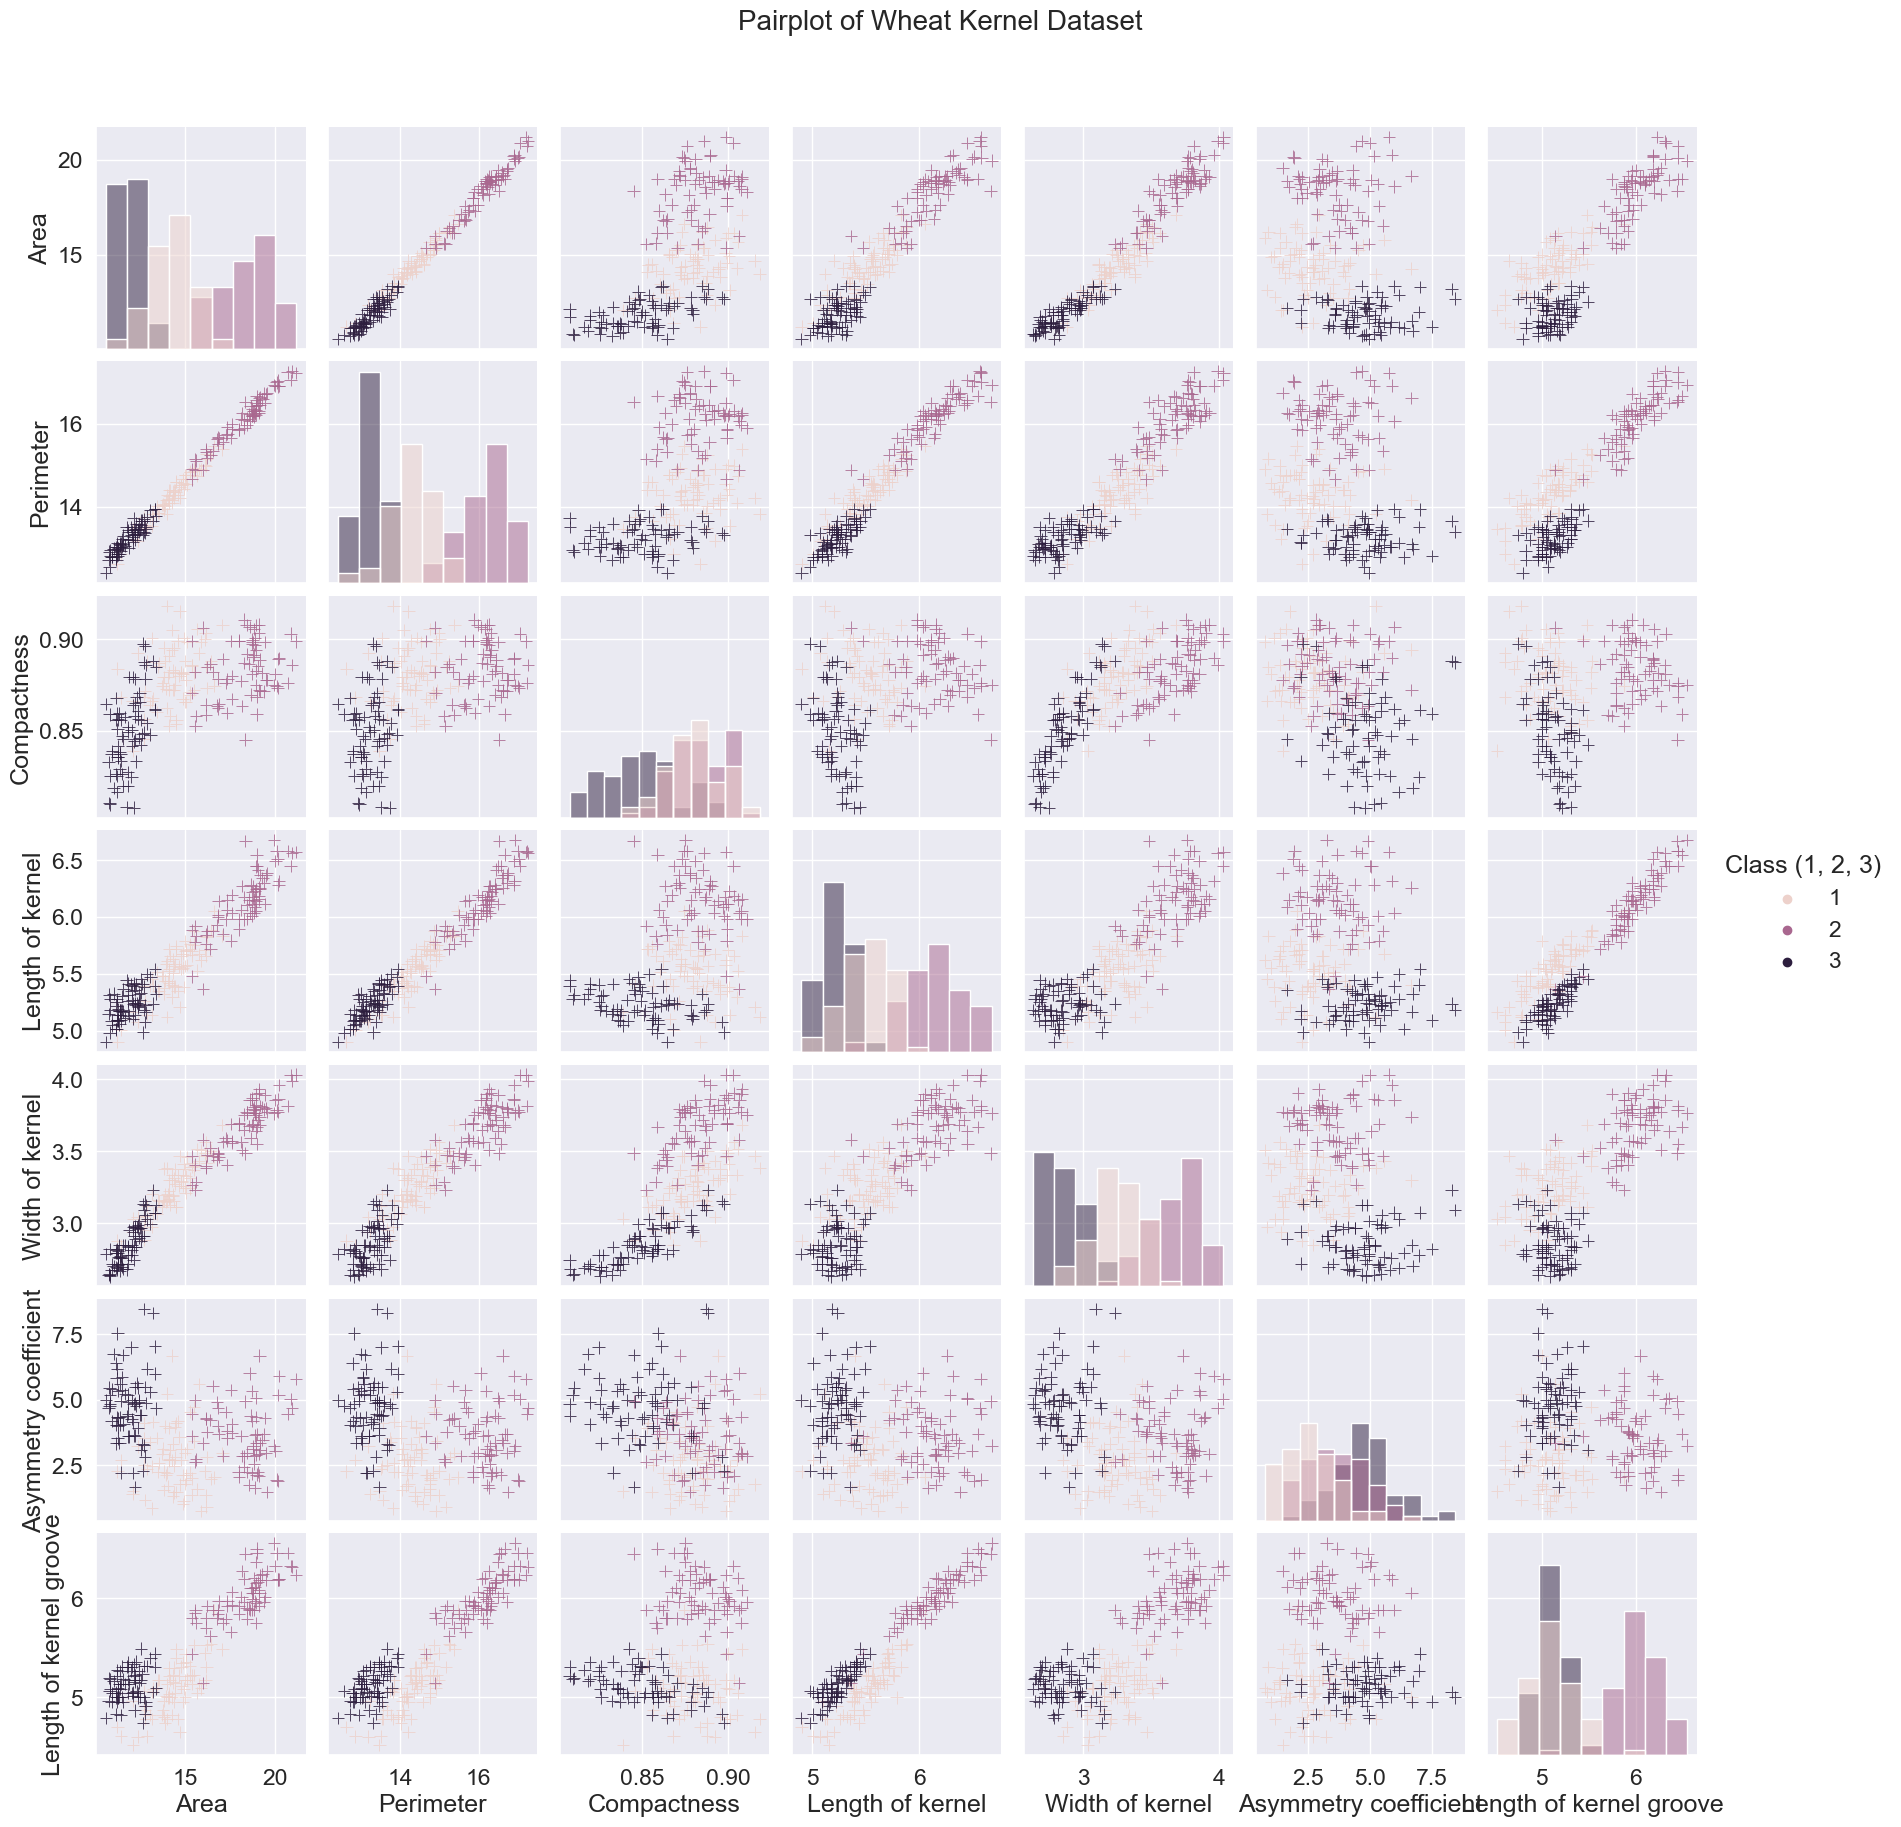

In [29]:
plt.figure(figsize=(30,25))
# Add titles to the axes
sns.set(font_scale=1.5)
sns.pairplot(df, hue='Class (1, 2, 3)', diag_kind='hist', markers='+',
             plot_kws={'alpha':0.8, 's':80, 'edgecolor':'k'})

# Add a title to the plot
plt.suptitle("Pairplot of Wheat Kernel Dataset", fontsize=20, y=1.05)

# Show the plot
plt.show()

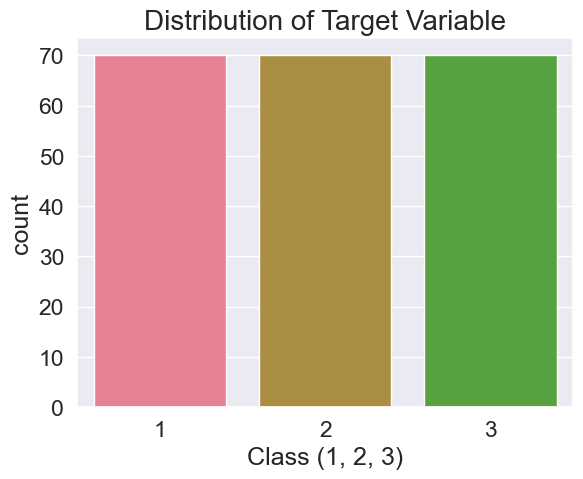

In [30]:
sns.set_palette("husl")

# Create the countplot
sns.countplot(x='Class (1, 2, 3)', data=df)

# Add a title to the plot
plt.title("Distribution of Target Variable", fontsize=20)

# Show the plot
plt.show()

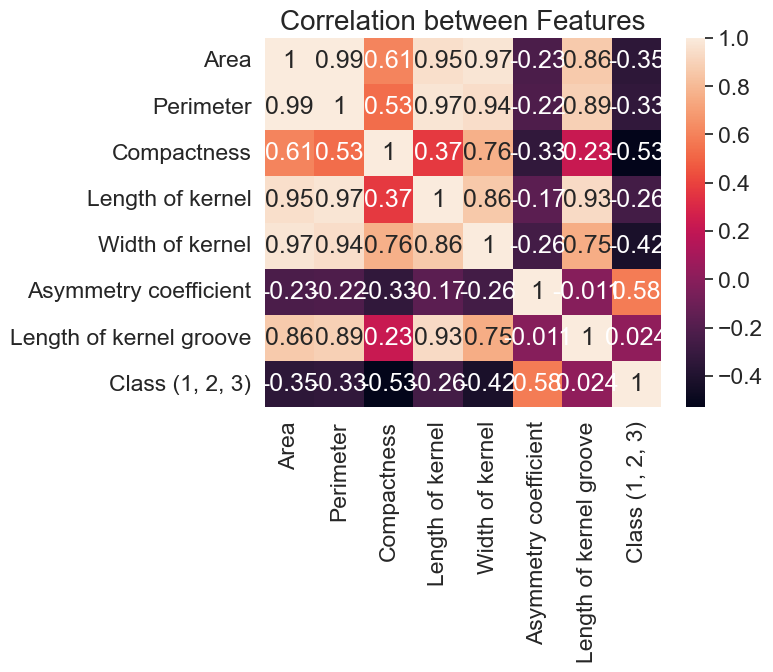

In [31]:
sns.set_palette("Reds")

# Compute the correlation matrix
corr = df.corr()

# Create the heatmap
sns.heatmap(corr, annot=True )

# Add a title to the plot
plt.title("Correlation between Features", fontsize=20)

# Show the plot
plt.show()

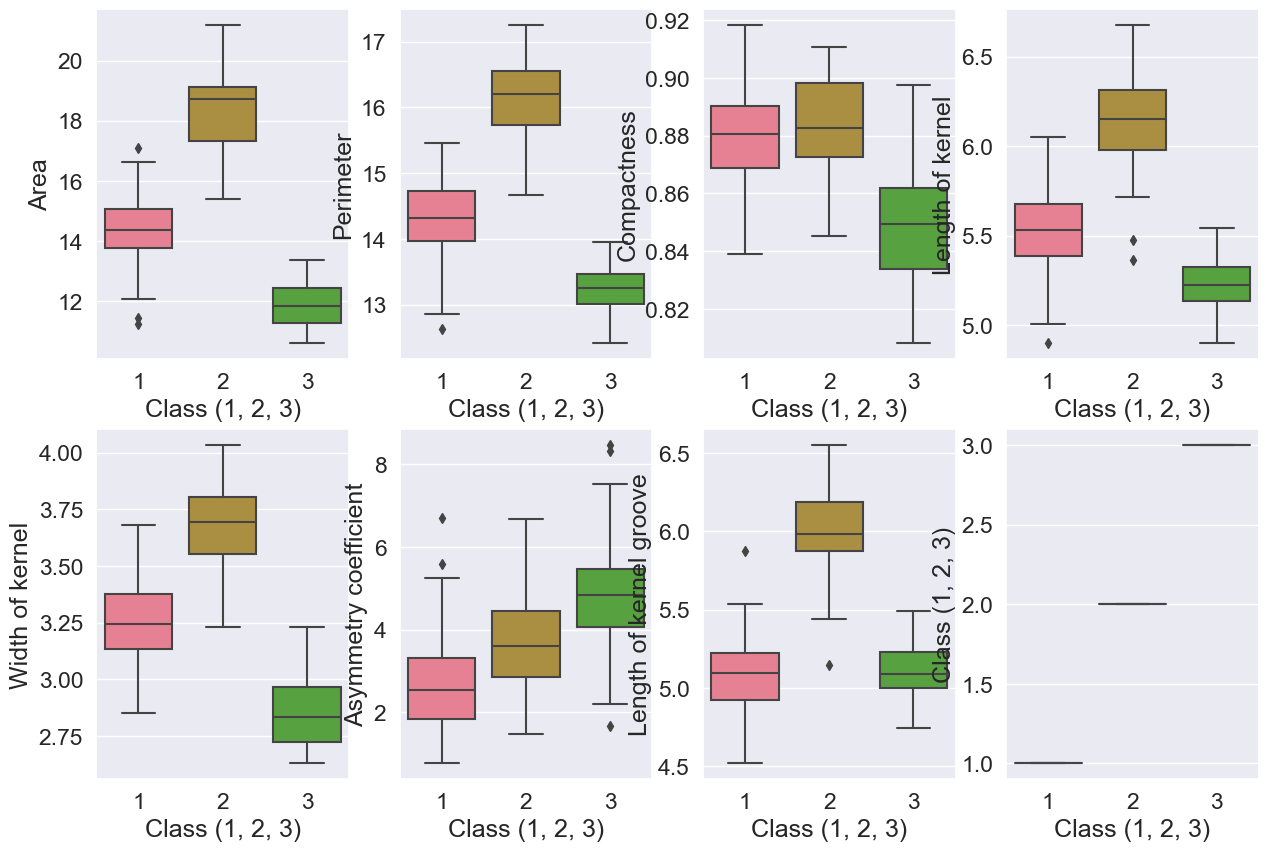

In [32]:
sns.set_palette("husl")
# Create a list of all the feature columns
features = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove','Class (1, 2, 3)']
# create a figure with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Iterate over the list of features and create a boxplot for each one
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.boxplot(x='Class (1, 2, 3)', y=feature, data=df, ax=axs[row, col])
plt.show()

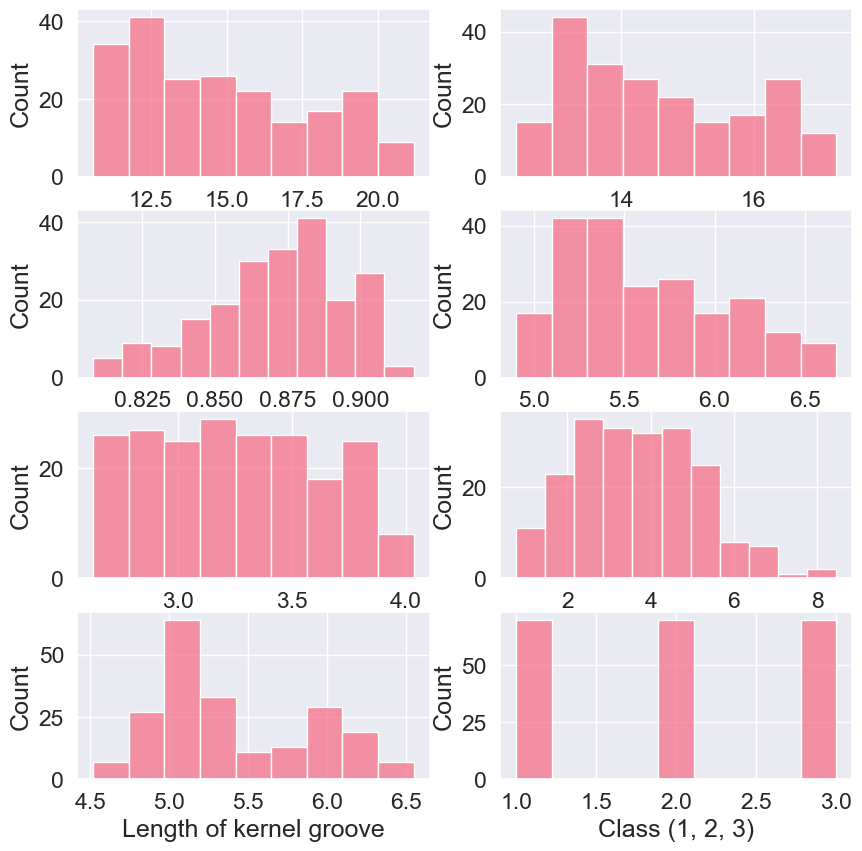

In [33]:
sns.set_palette("husl")
features = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove','Class (1, 2, 3)']

# create figure with 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
axs = axs.ravel()

# iterate through selected columns
for i, col in enumerate(features):
    sns.histplot(df[col], ax=axs[i])
plt.show()